# dr1_plotting

This notebook is intended to be used to create DR1 vetting plots. 

In [1]:
%matplotlib inline
import os,sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io.fits.hdu.hdulist import HDUList
import healpy as hp
from descolors import BAND_COLORS
#workdir = '/Users/Nacho/curro/des/dr1_validation/'
#datadir = '/Users/Nacho/curro/des/dr1_validation/'
#paperdir = '/Users/Nacho/dr1_paper/quality/Figures/'
workdir = '/Users/nsevilla/y3gold-paper/'
datadir = '/Users/nsevilla/des/sp_maps/'
paperdir = '/Users/nsevilla/y3gold-paper/figs/'

In [2]:
#load Alex's skymap utilities
import skymap
from skymap import Skymap,McBrydeSkymap,OrthoSkymap
from skymap import SurveySkymap,SurveyMcBryde,SurveyOrtho
from skymap import DESSkymap

SKYMAPS = [Skymap,McBrydeSkymap,OrthoSkymap]
SURVEYS = [SurveySkymap,SurveyMcBryde,SurveyOrtho]

NSIDE = 256

In [3]:
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['lines.linewidth'] = 3

In [4]:
import scipy.optimize
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2./(2.*sigma**2))

/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda2/envs/skymap/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indi

Stuff I've committed to do:
* Astrometry vs Gaia (get residuals from Paloma)
* Photometry vs Gaia (get residuals from Eli)
* Calibration errors (from Eli)
* NEPOCHS_{GRIZY} 
* MAG vs MAGERR (Paloma)
* FLAGS_{GRIZY}
* IMAFLAGS\_ISO_{GRIZY}
* SPREAD_MODEL vs SPREADERR_MODEL vs MAGS (Paloma)
* CLASS_STAR combinations (Paloma)

### Maps

In [ ]:
#let's draw some galaxy and stellar maps
#mask = (tdataDR1Sampls['SPREAD_MODEL_I']-tdataDR1Sample['SPREADERR_MODEL_I'] <= 0.002) &\
#    (tdataDR1Sample['MAG_AUTO_I'] > 15) & ((tdataDR1Sample['MAG_AUTO_I']) < 24)
plt.figure(figsize=(25,25))
hduDR1Stars = fits.open(datadir+'dr1_wavg_stars.fits',memmap=True)
tdataDR1Stars = hduDR1Stars[1].data
ra = tdataDR1Stars['RA']#[mask]
dec = tdataDR1Stars['DEC']#[mask]
smap = DESSkymap() 
hpxmap,(im,ra,dec,values) = smap.draw_hpxbin(ra,dec,nside=4096,xsize=3000)
plt.title('Stellar distribution (EXT_WAVG=0)',y=1.08)
plt.savefig(workdir+'dr1_stellar_distribution_wavg.png')

In [ ]:
#mask = (tdataDR1Sample['SPREAD_MODEL_I']+3*tdataDR1Sample['SPREADERR_MODEL_I'] > 0.005) & \
#    (tdataDR1Sample['MAG_AUTO_I'] > 17) & ((tdataDR1Sample['MAG_AUTO_I']) < 23)
plt.figure(figsize=(25,25))
hduDR1Galaxies = fits.open(datadir+'dr1_wavg_galaxies.fits',memmap=True)
tdataDR1Galaxies = hduDR1Galaxies[1].data
ra = tdataDR1Galaxies['RA']#[mask]
dec = tdataDR1Galaxies['DEC']#[mask]
smap = DESSkymap()                                                
hpxmap,(im,ra,dec,values) = smap.draw_hpxbin(ra,dec,nside=4096,xsize=3000)
plt.title('Galaxy distribution (EXT_WAVG=3)',y=1.08)
plt.savefig(workdir+'dr1_galaxy_distribution_wavg.png')

g 345.9375 229.21875 450.0
r 337.5 223.59375 445.78125
i 331.875 222.1875 438.75
z 345.9375 236.25 450.0
Y 182.8125 133.59375 243.28125


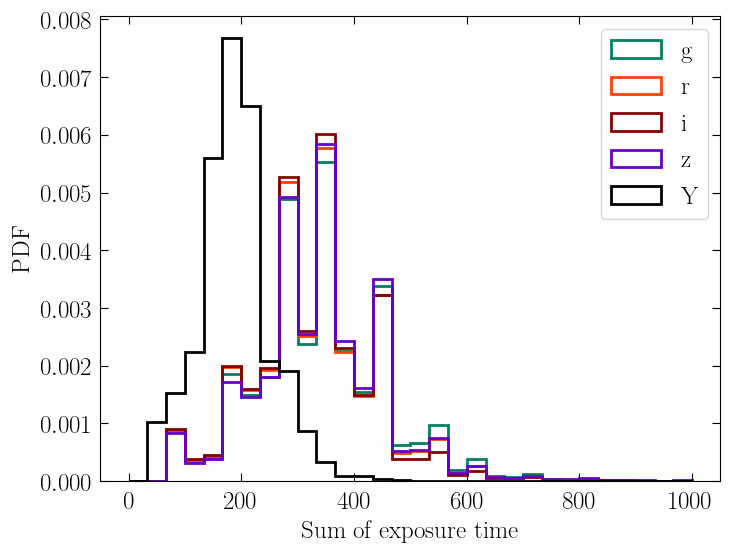

In [9]:
#survey properties
matplotlib.style.use('des_dr1')
hduSPlist = []
for i,(band,v) in enumerate(BAND_COLORS.items()):
    if band == 'u':
        continue
    hduSP = HDUList()
    filename = 'y3a2_'+band+'_o.4096_t.32768_EXPTIME.SUM_EQU.fits.gz'
    hduSP = fits.open(datadir+filename,memmap=True)
    #hduSPlist.append(hduSP)
    tdataSP = hduSP[1].data
    value = tdataSP['SIGNAL']
    plt.hist(value,normed=True,histtype='step',bins=30,linewidth=2,color=v,label=band,range=[0,1000])
    print(band,np.median(value),np.percentile(value,16),np.percentile(value,84))
    plt.xlabel('Sum of exposure time')
    plt.ylabel('PDF')
    plt.legend(loc='upper right')
plt.savefig(paperdir+'y3_exptime.png')

/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:9: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/y6a1_i_o.4096_t.32768_EXPTIME.SUM_EQU.fits' mode='rb' closefd=True>


[1. 1. 1. ... 1. 1. 1.]
(array([0.000000e+00, 0.000000e+00, 4.193200e+05, 2.767510e+05,
       3.168720e+05, 1.346702e+06, 5.996070e+05, 6.763650e+05,
       2.018109e+06, 7.016320e+05, 1.438501e+06, 1.550450e+05,
       8.933900e+04, 1.895880e+05, 2.454400e+04, 2.221200e+04,
       3.840000e+04, 6.521000e+03, 6.459000e+03, 8.709000e+03,
       1.345000e+03, 2.602000e+03, 7.090000e+02, 7.150000e+02,
       3.027000e+03, 3.490000e+02, 3.600000e+02, 8.480000e+02,
       6.900000e+01, 1.860000e+02]), array([ 0.        ,  0.36666667,  0.73333335,  1.1       ,  1.4666667 ,
        1.8333334 ,  2.2       ,  2.5666666 ,  2.9333334 ,  3.3       ,
        3.6666667 ,  4.0333333 ,  4.4       ,  4.766667  ,  5.133333  ,
        5.5       ,  5.866667  ,  6.233333  ,  6.6       ,  6.9666667 ,
        7.3333335 ,  7.7       ,  8.066667  ,  8.433333  ,  8.8       ,
        9.166667  ,  9.533334  ,  9.9       , 10.266666  , 10.633333  ,
       11.        ], dtype=float32), <a list of 1 Patch objects>)

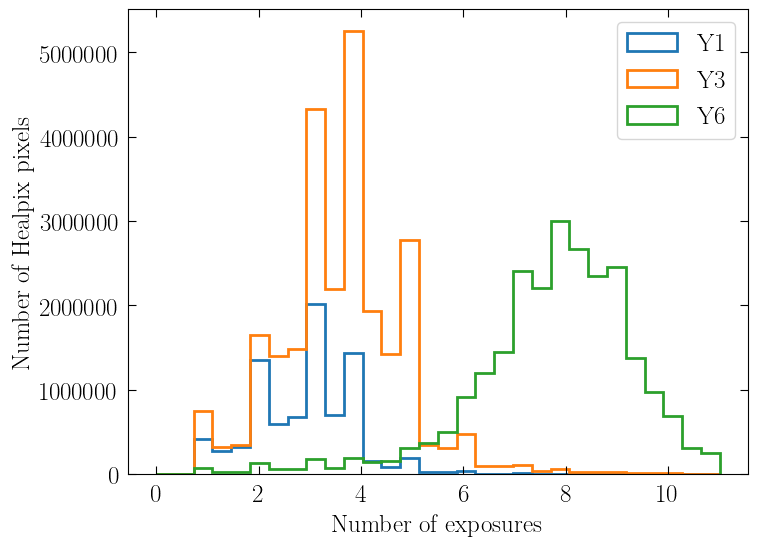

In [38]:
#survey properties
matplotlib.style.use('des_dr1')
filenames = ['Y1A1NEW_COADD_SPT_band_i_nside4096_oversamp4_EXPTIME__total.fits.gz',
             'y3a2_i_o.4096_t.32768_EXPTIME.SUM_EQU.fits.gz',
             'y6a1_i_o.4096_t.32768_EXPTIME.SUM_EQU.fits.gz']
#filenames = ['y1a1_gold_1.0.2_wide+d04_aper_4_nside4096_i_10sigma.fits.gz',
#            'y3a2_i_o.4096_t.32768_maglim_EQU.fits',
#            'y6a1_i_o.4096_t.32768_maglim_EQU.fits.gz']
labels = ['Y1','Y3','Y6']
hduSPlist = []
for c,filename in enumerate(filenames):
    hduSP = HDUList()
    hduSP = fits.open(datadir+filename,memmap=True)
    #hduSPlist.append(hduSP)
    tdataSP = hduSP[1].data
    value = tdataSP['SIGNAL']/90.
    print(tdataSP['SIGNAL']/90.)
    out = plt.hist(value,normed=False,histtype='step',bins=30,linewidth=2,label=labels[c],range=[0,11])
    print(out)
    print(labels[c],np.median(value),np.percentile(value,16),np.percentile(value,84))
    print(np.sum(out[0][1:29]*np.diff(out[1][1:30])))
    plt.xlabel('Number of exposures')
    plt.ylabel('Number of Healpix pixels')
    plt.legend(loc='upper right')
plt.savefig(paperdir+'y1y3y6_exptime_unnorm.png')

In [58]:
hduSP = fits.open(datadir+'y1a1_gold_1.0.2_wide+d04_aper_4_nside4096_i_10sigma.fits.gz',memmap=True)
tdataSP = hduSP[1].data


<class 'astropy.io.fits.fitsrec.FITS_rec'>


TypeError: invalid type promotion

In [60]:
print(tdataSP.columns)
print(hp.ma(tdataSP['I'].ravel()))

ColDefs(
    name = 'I'; format = '1024E'
)
[-- -- -- ... -- -- --]


In [14]:
hduSP = fits.open(datadir+filenames[0],memmap=True)
tdataSP = hduSP[1].data
print(len(tdataSP),tdataSP)

196608 [([-1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1.6375e+30, -1

Processing g


/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/y6a1_Y_o.4096_t.32768_maglim_EQU.fits' mode='rb' closefd=True>
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/sva1_gold_1.0.2-4_nside4096_nest_g_aper_4_weights.fits' mode='rb' closefd=True>
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_ma

Processing r


/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/y6a1_g_o.4096_t.32768_maglim_EQU.fits' mode='rb' closefd=True>
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/sva1_gold_1.0.2-4_nside4096_nest_r_aper_4_weights.fits' mode='rb' closefd=True>
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_ma

Processing i


/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/y6a1_r_o.4096_t.32768_maglim_EQU.fits' mode='rb' closefd=True>
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/sva1_gold_1.0.2-4_nside4096_nest_i_aper_4_weights.fits' mode='rb' closefd=True>
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_ma

Processing z


/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/y6a1_i_o.4096_t.32768_maglim_EQU.fits' mode='rb' closefd=True>
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/sva1_gold_1.0.2-4_nside4096_nest_z_aper_4_weights.fits' mode='rb' closefd=True>
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_ma

Processing Y


/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/y6a1_z_o.4096_t.32768_maglim_EQU.fits' mode='rb' closefd=True>
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_maps/sva1_gold_1.0.2-4_nside4096_nest_Y_aper_4_weights.fits' mode='rb' closefd=True>
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:30: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
/anaconda2/envs/skymap/lib/python3.6/site-packages/ipykernel/__main__.py:23: ResourceWarning: unclosed file <_io.FileIO name='/Users/nsevilla/des/sp_ma

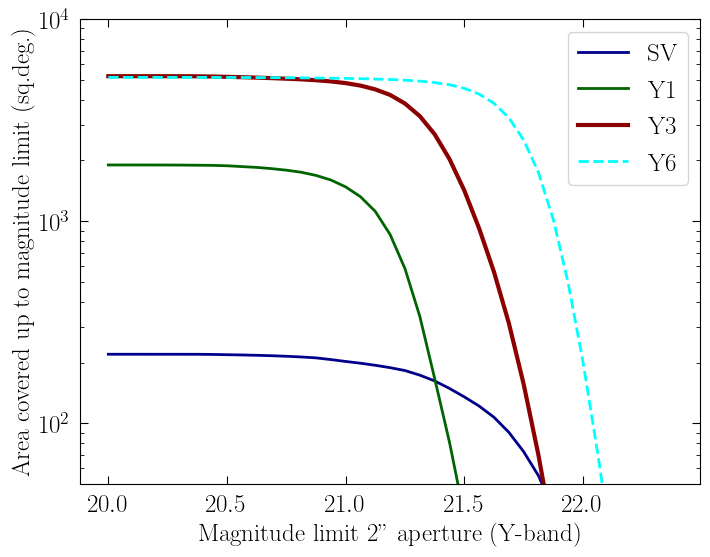

In [25]:
matplotlib.style.use('des_dr1')
#filenames = ['Y1A1NEW_COADD_SPT_band_i_nside4096_oversamp4_EXPTIME__total.fits.gz',
#             'y3a2_i_o.4096_t.32768_EXPTIME.SUM_EQU.fits.gz',
#             'y6a1_i_o.4096_t.32768_EXPTIME.SUM_EQU.fits.gz']
bands = ['g','r','i','z','Y']
minrange = [23,22.5,22,21.5,20]
maxrange = [25.5,25,24.5,24,22.5]
ravelflag = [True,True,False,False]
linestyles = ['solid','solid','solid','dashed']
linewidths = [2,2,3,2]
labels = ['SV','Y1','Y3','Y6']
colors = ['darkblue','darkgreen','darkred','cyan']
for b,band in enumerate(bands):
    print('Processing',band)
    filenames = ['sva1_gold_1.0.2-4_nside4096_nest_'+band+'_aper_4_weights.fits',
                'y1a1_gold_1.0.2_wide+d04_aper_4_nside4096_'+band+'_10sigma.fits',
                'y3a2_'+band+'_o.4096_t.32768_maglim_EQU.fits',
                'y6a1_'+band+'_o.4096_t.32768_maglim_EQU.fits']
    hduSPlist = []
    plt.clf()
    binlim = 39
    for c,filename in enumerate(filenames):
        hduSP = HDUList()
        hduSP = fits.open(datadir+filename,memmap=True)
        tdataSP = hduSP[1].data
        if ravelflag[c]:
            value = hp.ma(tdataSP['I'].ravel())-0.032 #correction to bring to 2" from MAG_APER4 which has 1.9488"
        else:
            value = tdataSP['SIGNAL']
        out = np.histogram(value,normed=False,bins=binlim+1,range=[minrange[b],maxrange[b]])
        X = []
        Y = []
        for i in range(binlim):
            X.append(out[1][i])
            Y.append(np.sum(out[0][i:binlim]*hp.nside2pixarea(4096,degrees=True)))
        plt.plot(X,Y,label=labels[c],color=colors[c],lw=linewidths[c],ls=linestyles[c])
    plt.yscale("log")
    plt.ylim(50.,10000.)
    plt.xlabel("Magnitude limit 2'' aperture ("+band+"-band)")
    plt.ylabel('Area covered up to magnitude limit (sq.deg.)')
    plt.legend(loc='upper right')
    plt.savefig(paperdir+'svy1y3y6_2asec_'+band+'_area_covered.png')

In [ ]:
plt.savefig('/Users/Nacho/curro/des/y3_fwhm_wmean.png')

In [ ]:
print tdataSP.columns

In [ ]:
#FGCM errors
matplotlib.style.use('des_dr1')
hduFGCMErr = fits.open(workdir+'y3a1_fgcm_2_5_errmap.fit',memmap=True)
#hduFGCMErr = fits.open(workdir+'y3a1_fgcm_3_7_errmap.fit',memmap=True)
tdataFGCMErr = hduFGCMErr[1].data
for i,(band,v) in enumerate(BAND_COLORS.items()):
    if band == 'u':
        continue
    print 'Processing band',band
    mask = tdataFGCMErr['NOBS'][:,i-1] > 0
    pix = tdataFGCMErr['HPIX'][mask]
    offset = tdataFGCMErr['CAL_ERR'][:,i-1][mask]
    fig = plt.figure(figsize=(16.,4.))
    gridspec = plt.GridSpec(1,3,wspace=1.2)
    smap = DESSkymap()
    smap.draw_hpxmap(offset.byteswap().newbyteorder(),pix.byteswap().newbyteorder(),NSIDE,xsize=1000)
    smap.draw_inset_colorbar(fontsize=18,ticks=[0.004,0.0052])
    smap.draw_des()
    plt.title('FGCM calibration error, '+band+' band',y=1.08)
    ax2 = plt.Subplot(fig,gridspec[2])
    ax2b = ax2.twinx()
    fig.add_subplot(ax2)
    plt.sca(ax2)
    plt.xlabel('Error (mag)')
    #plt.sca(ax2b)
    #ax2b = ax2.twinx()
    plt.ylabel('PDF',labelpad=1)
    n,b,p = plt.hist(offset,normed=True,histtype='step',bins=100,linewidth=2,color=v)
    p0 = [offset.size, np.median(offset), np.std(offset)]
    text1 = 'median = %.3f' % p0[1] 
    ax2.annotate(text1,(0.2,0.95),xycoords='axes fraction',ha='left',va='top',size=18)
    filename = paperdir+'fgcm_calib_error_'+band+'_nozpcorr.pdf'
    plt.savefig(filename,bbox_inches='tight')
    filename = paperdir+'fgcm_calib_error_'+band+'_nozpcorr.png'
    plt.savefig(filename,bbox_inches='tight')

In [ ]:
#load Gaia photometric residuals
hduGaiaResiduals = fits.open(workdir+'y3a1_gaia_offsets_0515-nobs.fit',memmap=True) #no corrections
#hduGaiaResiduals = fits.open(workdir+'y3a1_gaia_apercorr_v3.7_offsets_ng1_05-15.fit',\
#                             memmap=True)
tdataGaiaResiduals = hduGaiaResiduals[1].data
## this is an nside=256 vector with 5 columns

In [ ]:
mask = (tdataGaiaResiduals['NSTAR'] > 10)
#plt.hist(tdataGaiaResiduals['OFFSET'][mask],bins=50,range=[-0.03,0.03])
pix = tdataGaiaResiduals['HPIX'][mask]
offset = tdataGaiaResiduals['OFFSET'][mask]

In [ ]:
fig = plt.figure(figsize=(16.,4.))
gridspec = plt.GridSpec(1,3,wspace=1.02)
smap = DESSkymap()
#fa, ax = smap.create_axes(rect=gridspec[0:2])
smap.draw_hpxmap(offset.byteswap().newbyteorder(),pix.byteswap().newbyteorder(),NSIDE,xsize=1000)
smap.draw_inset_colorbar(fontsize=18,ticks=[-0.01,0.01])
smap.draw_des()
plt.title(r'$G_{Gaia}-G_{pred}(r_{DES})$',y=1.08)
ax2 = plt.Subplot(fig,gridspec[2])
fig.add_subplot(ax2)
plt.sca(ax2)
### fit Gaussian to residuals
n,b,p = plt.hist(offset,normed=True,histtype='step',bins=100)
hist_fit_x = (np.array(b[0:-1])+np.array(b[1:]))/2.
hist_fit_y = np.array(n)
p0 = [offset.size, np.mean(offset), np.std(offset)]
coeff,var_matrix = scipy.optimize.curve_fit(gauss, hist_fit_x, hist_fit_y, p0=p0)
xvals = np.linspace(-5*coeff[2],5*coeff[2],1000)
yvals = gauss(xvals,*coeff)
plt.plot(xvals,yvals,'k--',linewidth=2)
plt.xlabel(r'$G_{Gaia}-G_{pred}(r_{DES})$ (mag)')
plt.ylabel('PDF',labelpad=1)
text1 = r'$\mu = %.4f$' % coeff[1]
text2 = r'$\sigma = %.4f$' % coeff[2]
ax2.annotate(text1,(0.55,0.95),xycoords='axes fraction',ha='left',va='top',size=14)
ax2.annotate(text2,(0.57,0.87),xycoords='axes fraction',ha='left',va='top',size=14)
#plt.savefig(workdir+'gaia_phot_residual.png',bbox_inches='tight')
plt.savefig(paperdir+'gaia_phot_residual_nozpcorr.pdf',bbox_inches='tight')

In [ ]:
#load Gaia astrometric residuals
hduGaiaResiduals = fits.open(workdir+'astroresiduals.fits',memmap=True)
tdataGaiaResiduals = hduGaiaResiduals[1].data

In [ ]:
mask = (tdataGaiaResiduals['OFFSET'] > 0)
pix = tdataGaiaResiduals['HPIX'][mask]
offset = tdataGaiaResiduals['OFFSET'][mask]

In [ ]:
plt.rcParams['figure.figsize'] = 8., 6.
plt.rcParams['figure.dpi'] =  100
plt.rcParams['figure.subplot.left'] = 0.125
plt.rcParams['figure.subplot.right'] = 0.9
plt.rcParams['figure.subplot.bottom'] = 0.125
plt.rcParams['figure.subplot.top'] = 0.9
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
#plt.rcParams['xtick.direction'] = in
#plt.rcParams['ytick.direction'] = in
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.pad'] =    6.
plt.rcParams['xtick.minor.pad'] = 6.
plt.rcParams['ytick.major.pad'] = 6.
plt.rcParams['ytick.minor.pad'] = 6.
plt.rcParams['xtick.major.size'] = 6.      # major tick size in points
plt.rcParams['xtick.minor.size'] = 3.    # minor tick size in points
plt.rcParams['ytick.major.size'] = 6.      # major tick size in points
plt.rcParams['ytick.minor.size'] = 3.    # minor tick size in points
#text.usetex           : True
plt.rcParams['font.family'] = u'DejaVu Serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman Bold'
plt.rcParams['font.size'] = 14


In [ ]:
#matplotlib.style.use('classic')
matplotlib.style.use('des_dr1')
fig = plt.figure(figsize=(16.,4.))
gridspec = plt.GridSpec(1,3,wspace=1.02)
smap = DESSkymap()
smap.draw_hpxmap(offset.byteswap().newbyteorder(),pix.byteswap().newbyteorder(),NSIDE,xsize=1000)
smap.draw_inset_colorbar(fontsize=18, ticks=[0.07,0.2])
smap.draw_des()
plt.title('Astrometric residual vs Gaia ($G\sim16$ stars) in arcsecs',y=1.08)
ax2 = plt.Subplot(fig,gridspec[2])
fig.add_subplot(ax2)
plt.sca(ax2)
plt.xlabel('Astrometric residual in arcsecs')
plt.ylabel('PDF',labelpad=1)
n,b,p = plt.hist(offset,normed=True,histtype='step',bins=100,linewidth=2)
p0 = [offset.size, np.median(offset), np.std(offset)]
text1 = 'median = %.3f \'\'' % p0[1] 
ax2.annotate(text1,(0.35,0.95),xycoords='axes fraction',ha='left',va='top',size=14)
filename = paperdir+'gaia_astro_residual.pdf'
plt.savefig(filename,bbox_inches='tight')
filename = paperdir+'gaia_astro_residual.png'
plt.savefig(filename,bbox_inches='tight')

In [ ]:
#load Y3A2+band g sample for PSF failures demonstration
#hduY3A2Sample = fits.open(datadir+'y3a2_sample1_for_psffailure.fits',memmap=True)
hduY3A2Sample = fits.open(datadir+'psf_residual.fits',memmap=True)
tdataY3A2Sample = hduY3A2Sample[1].data
print tdataY3A2Sample.columns
psfres = tdataY3A2Sample['PSFRES']
pix = tdataY3A2Sample['HPIX_1024']
pix = hp.nest2ring(1024,pix)

In [ ]:
plt.hist(tdataY3A2Sample['PSFRES'])

In [ ]:
ra,dec = hp.pix2ang(1024, pix, lonlat=True, nest=False)
plt.scatter(ra,dec)

In [ ]:
fig = plt.figure(figsize=(16.,4.))
gridspec = plt.GridSpec(1,3,wspace=0.8)
smap = DESSkymap()
smap.draw_hpxmap(psfres,pix,1024,xsize=1000)
smap.draw_inset_colorbar(fontsize=12)
#smap.draw_des()
plt.title('MAG\_PSF\_I-WAVG\_MAG\_PSF\_I',y=1.08)
ax2 = plt.Subplot(fig,gridspec[2])
fig.add_subplot(ax2)
plt.sca(ax2)
plt.xlabel('Residual')
n,b,p = plt.hist(psfres,normed=True,histtype='step',bins=100,linewidth=2)
plt.yscale('log')
p0 = [psfres.size, np.mean(psfres), np.std(psfres)]
#text1 = 'mean = %.3f \'\'' % p0[1] 
#ax2.annotate(text1,(0.4,0.95),xycoords='axes fraction',ha='left',va='top',size=18)
#plt.savefig(workdir+'gaia_astro_residual.png',bbox_inches='tight')
#plt.savefig(paperdir+'psf_residual.pdf',bbox_inches='tight')

### Make histograms

In [ ]:
#load DR1 sample
hduDR1Sample = fits.open(datadir+'dr1_sample1.fits',memmap=True)
tdataDR1Sample = hduDR1Sample[1].data

In [ ]:
#number of epochs
plt.rcParams.update(plt.rcParamsDefault)
for i,(n,v) in enumerate(BAND_COLORS.items()):
    #plt.ylim(1000,10000000)
    if n != 'u':
        label = 'NEPOCHS_' + n.upper()
        plt.hist(tdataDR1Sample[label],
                 histtype='step',range=[0,10],bins=10,
                 lw=2,log=False,normed=False,label=label,color=v)
plt.xlabel('Number of single epoch detections of coadd object')
plt.legend(loc='upper right')
#plt.savefig(workdir+'nepochs.png')

In [ ]:
#SExtractor FLAGS
plt.rcParams.update(plt.rcParamsDefault)
for i,(n,v) in enumerate(BAND_COLORS.items()):
    #plt.ylim(1000,10000000)
    if n != 'u':
        label = 'FLAGS_' + n.upper()
        plt.hist(tdataDR1Sample[label],
                 histtype='step',range=[0,10],bins=10,
                 lw=2,log=True,normed=True,label=label,color=v)
plt.xlabel('SExtractor FLAGS')
plt.legend(loc='upper right')
plt.savefig(workdir+'flags.png')

In [ ]:
print tdataDR1Sample.columns

In [ ]:
#magnitude distributions
plt.clf()
#plt.rcParams.update(plt.rcParamsDefault)
matplotlib.style.use('des_dr1')
magstring = 'MAG_AUTO_'
for i,(band,v) in enumerate(BAND_COLORS.items()):
    #plt.ylim(1000,10000000)
    if band == 'u':
        continue
    #label = magstring.replace("_","\_")+'\_'+band.upper()
    label = band+'-band'
    #mask = (tdataDR1Sample['FLAGS_' + band.upper()] < 4) & \
    #    (tdataDR1Sample['IMAFLAGS_ISO_' + band.upper()] == 0)
    #mask = (tdataDR1Sample['NEPOCHS_G'] < 2) #&\
    #(tdataDR1Sample['SPREAD_MODEL_I']-tdataDR1Sample['SPREADERR_MODEL_I']< 0.001)
    n,bins, patches = plt.hist(tdataDR1Sample[magstring+band.upper()],
                 histtype='step',range=[12,28],bins=300,
                 lw=2,normed=True,label=label,color=v)
    print bins[np.argmax(n)]
plt.xlabel('MAG\_AUTO')
plt.ylabel('PDF')
plt.legend(loc='upper left')
#plt.savefig(workdir+'wavg_mag_psf.png')
plt.savefig(paperdir+'dr1_magauto_pdfonly.pdf')

### Make density plots

In [ ]:
#load DR1 sample
hduDR1Sample = fits.open(datadir+'y3a2_sample1_for_magaper4depth.fits',memmap=True)
tdataDR1Sample = hduDR1Sample[1].data

In [ ]:
#plt.rcParams.update(plt.rcParamsDefault)
matplotlib.style.use('des_dr1')
magType = ['MAG_APER_4']#,'WAVG_MAG_PSF']#and MAG_PETRO
magerrType = ['MAGERR_APER_4']#,'WAVG_MAGERR_PSF']#and MAG_PETRO
magName = ['aper_4']
xmin = 18
xmax = 25
ymin = 0
ymax = 0.4
for j,magstring in enumerate(magType):
    magerrstring = magerrType[j]
    magnamestring = magName[j]
    for i,(band,v) in enumerate(BAND_COLORS.items()):
        if band == 'u':
            continue
        print 'Processing band',band
        fig = plt.figure(figsize=(5.,8.))
        gridspec = plt.GridSpec(2,1,wspace=0.5)
        #ax = fig.add_subplot(1,1,1)
        ax = plt.Subplot(fig,gridspec[0])
        fig.add_subplot(ax)
        plt.sca(ax)
        plt.xlabel(magstring.replace("_","\_")+'\_'+band.upper())
        plt.ylabel(magerrstring.replace("_","\_")+'\_'+band.upper())
        mask = (tdataDR1Sample[magstring+'_'+band.upper()] > xmin) &\
        (tdataDR1Sample[magstring+'_'+band.upper()] < xmax) &\
        (tdataDR1Sample[magerrstring+'_'+band.upper()] < ymax) &\
        (tdataDR1Sample[magerrstring+'_'+band.upper()] > ymin)
        hb = ax.hexbin(tdataDR1Sample[magstring+'_'+band.upper()][mask],\
            tdataDR1Sample[magerrstring+'_'+band.upper()][mask],\
            gridsize=(100),cmap='GnBu',mincnt=1)
        #ax.axhline(0.3123,label='S/N = 3',color='r')
        ax.axhline(0.108,label='S/N = 10',color='g')
        ax.axis([xmin,xmax,ymin,ymax])
        ax.legend(bbox_to_anchor=(0.08,0.9),loc=2,borderaxespad=0.)
        #ax.set_xlabel(magstring+'_'+band.upper())
        #ax.set_ylabel(magerrstring+'_'+band.upper())
        #ax.set_title(magerrstring+' vs '+magstring+' for filter '+band)
        cb = fig.colorbar(hb, ax=ax)
        cb.set_label('N')
        #fig = plt.figure()
        ax2 = plt.Subplot(fig,gridspec[1])
        fig.add_subplot(ax2)
        plt.sca(ax2)
        plt.xlabel(magstring.replace("_","\_")+'\_'+band.upper()+' at $S/N\sim10$')
        mask = (tdataDR1Sample[magerrstring+'_'+band.upper()] > 0.105) &\
            (tdataDR1Sample[magerrstring+'_'+band.upper()] < 0.115) #&\
            #(abs(tdataDR1Sample['SPREAD_MODEL_I'])<0.002)
        n, bins, patches = plt.hist(tdataDR1Sample[magstring+'_'+band.upper()][mask],bins=150,\
                                   histtype='step',lw=2)
        print magstring+'_'+band.upper(),bins[np.argmax(n)]
        #plt.savefig(workdir+'mag_magerr_'+magnamestring+'_'+band+'_test.pdf',bbox_inches="tight")


In [ ]:
mask = (tdataDR1Sample['MAGERR_AUTO_I'] > 0.105) & (tdataDR1Sample['MAGERR_AUTO_I'] < 0.115)
#plt.scatter(tdataDR1Sample['MAG_AUTO_I'],tdataDR1Sample['MAGERR_AUTO_I'])
n, bins, patches = plt.hist(tdataDR1Sample['MAG_AUTO_I'][mask],bins=250)
print bins[np.argmax(n)]